In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_logistic_cost(X, y, beta):
    """
    Compute the binary cross-entropy cost for logistic regression.

    Parameters:
    X : numpy array of shape (m, n), the design matrix
    y : numpy array of shape (m,), true labels (0 or 1)
    beta : numpy array of shape (n,), the model weights including intercept
    
    Returns:
    cost : scalar value of the cost
    """
    m = X.shape[0]
    h = sigmoid(np.dot(X, beta))  # Predictions using sigmoid
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))  # Binary cross-entropy loss, log likelihood/ loss? is that the same?
    return cost

def logistic_gradient(batch_size, Xi, yi, beta, lmbda=0.001):
    """
    Calculate the gradient for logistic regression with L2 regularization.
    
    Parameters:
    batch_size : int, number of samples in the batch
    Xi : numpy array of shape (batch_size, n), the batch of input data
    yi : numpy array of shape (batch_size,), true labels for the batch
    beta : numpy array of shape (n,), current model weights
    lmbda : float, regularization strength (default: 0.001)
    
    Returns:
    gradient : numpy array of shape (n,), the gradient with respect to beta
    """
    # Predictions with sigmoid
    probabilities = sigmoid(np.dot(Xi, beta))
    
    # Compute the gradient
    gradient = (1 / batch_size) * np.dot(Xi.T, (probabilities - yi))
    
    # Add L2 regularization (do not regularize the intercept term)
    gradient[1:] += (lmbda / batch_size) * beta[1:]
    
    return gradient


def stochastic_gradient_descent(X, y, beta, learning_rate, n_iterations, model=None, approx=None, momentum=False, gamma=0.9, momentum_gamma=0.999, epsilon=1e-8, batch_size=1, lmbda = 0.001):
    n = len(X)
    velocity = np.zeros_like(beta)  
    G = np.zeros_like(beta)  
    t=0 ##only for ADAM
    for _ in range(n_iterations):
        if approx is not None or momentum: 
            indices = np.random.permutation(n)
            X = X[indices]
            y = y[indices]
        for i in range(0, n, batch_size):
            t+=1
            Xi = X[i:i+batch_size]
            yi = y[i:i+batch_size]
            gradient = model(batch_size, Xi, yi, beta, lmbda)
            if approx is not None:
                G, beta = approx(G, momentum, velocity, gradient, learning_rate, epsilon, gamma, momentum_gamma, beta, t)
            elif momentum:
                velocity = gamma * velocity + learning_rate * gradient
                beta -= velocity
            else:
                beta -= learning_rate * gradient
    return beta


def predict(X, beta):
    """
    Generate class predictions (0 or 1) for logistic regression.
    
    Parameters:
    X : numpy array of shape (m, n), the design matrix
    beta : numpy array of shape (n,), the model weights including intercept
    
    Returns:
    predictions : numpy array of shape (m,), predicted class labels (0 or 1)
    """
    # Compute the probability estimates
    probabilities = sigmoid(np.dot(X, beta))
    
    # Convert probabilities to class labels (0 or 1) based on threshold 0.5
    predictions = (probabilities >= 0.5).astype(int)
    return predictions

def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.
    
    Parameters:
    y_true : numpy array of shape (m,), true labels
    y_pred : numpy array of shape (m,), predicted labels
    
    Returns:
    accuracy : float, the accuracy of predictions
    """
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

# Generate the dataset
np.random.seed(2024)  # For reproducibility
n_samples, n_features = 100, 2
X = np.random.rand(n_samples, n_features)

# True beta for logistic regression isn't relevant for classification, we can skip that part for now
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple binary classification problem

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(n_samples), X]

# Initial guess for beta
initial_beta = np.zeros(X.shape[1])

# Gradient Descent Parameters
learning_rate = 0.1
n_iterations = 1000
batch_size = 1
lmbda = 0.01

# Initial weights
initial_beta = np.zeros(X.shape[1])

# Logistic regression-specific SGD
# Train model using the modified SGD
beta_gd = stochastic_gradient_descent(
    X, y, initial_beta,
    learning_rate=learning_rate,
    n_iterations=n_iterations,
    model=logistic_gradient,  # Use the logistic gradient function
    approx=None,  # Use standard SGD (no advanced optimizers)
    momentum=False,
    gamma=0.9,
    momentum_gamma=0.999,
    epsilon=1e-8,
    batch_size=batch_size,
    lmbda=lmbda
)

# Generate predictions for the training data
y_pred = predict(X, beta_gd)

# Print results
print(f"Learned beta from logistic regression SGD: {beta_gd}")

# Calculate and print the accuracy
accuracy = calculate_accuracy(y, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy * 100:.2f}%")

Learned beta from logistic regression SGD: [-2.94052082  3.18944826  3.09654817]
Accuracy of the logistic regression model: 93.00%


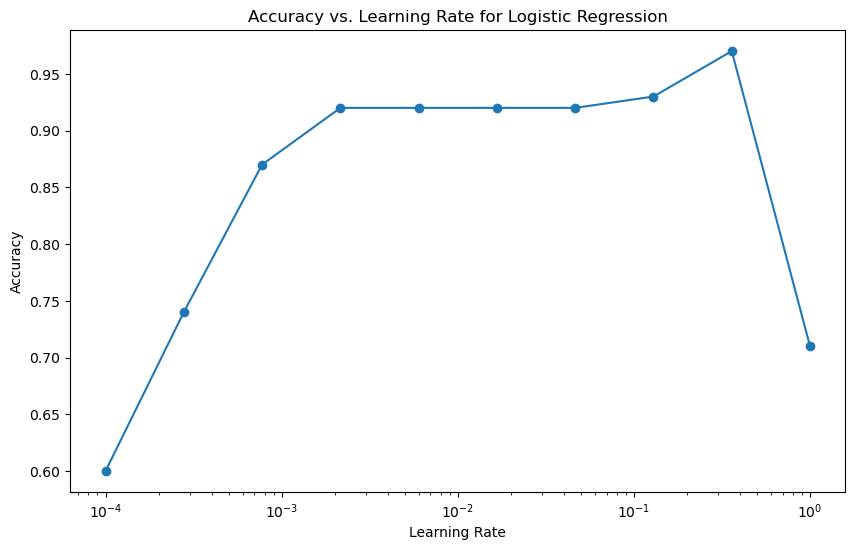

In [3]:
### Plot Accuracy against Learning rate ###

# Define a range of learning rates to test
learning_rates = np.logspace(-4, 0, 10)  # from 0.0001 to 1
accuracies = []

# Loop through learning rates, train the model, and calculate accuracy
for lr in learning_rates:
    initial_beta = np.zeros(X.shape[1])
    beta_gd = stochastic_gradient_descent(
        X, y, initial_beta,
        learning_rate=lr,
        n_iterations=n_iterations,
        model=logistic_gradient,
        batch_size=batch_size,
        lmbda=lmbda
    )
    y_pred = predict(X, beta_gd)
    accuracy = calculate_accuracy(y, y_pred)
    accuracies.append(accuracy)

# Plot accuracy against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for Logistic Regression')
plt.show()

In [4]:
### Scikit-Learn Logistic regression ###

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Generate the dataset
np.random.seed(2024)  # For reproducibility
n_samples, n_features = 100, 2
X = np.random.rand(n_samples, n_features)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary classification problem

# Add a column of ones to X for the intercept term (Scikit-Learn will handle intercept automatically)
# No need to add intercept manually for Scikit-Learn

# Instantiate and fit the Scikit-Learn logistic regression model
scikit_log_reg = LogisticRegression(penalty='l2', C=1/lmbda, solver='lbfgs', max_iter=1000)  # C is the inverse of lambda
scikit_log_reg.fit(X, y)

# Generate predictions with the Scikit-Learn model
y_pred_scikit = scikit_log_reg.predict(X)

# Calculate accuracy with Scikit-Learn model
accuracy_scikit = accuracy_score(y, y_pred_scikit)

# Print results
print(f"Scikit-Learn Logistic Regression coefficients: {scikit_log_reg.coef_}")
print(f"Scikit-Learn Logistic Regression intercept: {scikit_log_reg.intercept_}")
print(f"Scikit-Learn Logistic Regression accuracy: {accuracy_scikit * 100:.2f}%")

Scikit-Learn Logistic Regression coefficients: [[19.52242378 18.98620614]]
Scikit-Learn Logistic Regression intercept: [-19.14251062]
Scikit-Learn Logistic Regression accuracy: 100.00%


Scikit-Learn logistic regression does NOT have a Learning rate. The model is improved differently.